# 타이타닉 
---
- 타이타닉에 탑승한 사람들의 신상정보를 활용하여, 승선한 사람들의 생존여부를 예측하는 모델을 생성
- 여러 시각화 도구(matplotlib, seaborn, plotly), 데이터 분석 도구(pandas, numpy), 머신 러닝 도구(sklearn)을 사용


## 가설
1. Pclass :  좋은 객실을 사용한 승객이 더 많이 살아남았을 것이라는 가설 
2. Age : 젊은사람일수록 에너지가 있으니까 더 많이 살아 남았을거라는 가설 
3. Fare : 탑승료에 따른 생존률, 근데 이거는 pclass와 겹치거나 할것같음
4. sex : 여성이 더 많이 살아 남았을것이라는 가설 

## 일단 사용하는 모듈 
 - 넘파이 
 - 판다스 
 - 맷폴랫
 - 시본 
 
 - missingno =>  missingno 패키지를 사용하면 누락데이터에 대한 시각화
 - 워닝 방지 


In [54]:
# !pip install missingno 

In [55]:
# import
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)
# matplotlib 의 기본 scheme 말고 seaborn scheme 을 세팅하고, 
# 일일이 graph 의 font size 를 지정할 필요 없이 seaborn 의 font_scale 을 사용하면 편합니다.

import missingno as msno


# ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 앞으로의 프로세스 
### 1. 데이터 셋 확인 
    - null data 확인(결측치)하고 추후 수정 
### 2. 탐색적 데이터 분석(**E**xploratory **D**ata **A**nalysis)  
    - 여러 특징(feature)들을 개별적으로 분석하고 특징들의 상관관계를 확인 
    - 여러 시각화 툴을 이용하여 통찰력(insight)을 얻음 
### 3. 특징을 엔지니어링
    - 모델의 성능을 높일 수 있도록 특징들을 엔지니어링
    - one-hot encoding, class로 나누기, 구간으로 나누기, 텍스트 데이터 처리등...
### 4. 모델 만들기 
    - 사잇킷런을 사용하여 모델을 생성 
    - sklearn 을 사용하면 수많은 알고리즘을 일괄된 문법으로 사용가능
### 5. 모델 학습 및 예측 
    - 트레인 셋을 가지고 모델 학습
    - 테스트 셋으로 예측(prediction)함 
### 6. 모델 평가 
    - 예측 성능이 원하는 수준인지 판단 
    - 풀려는 문제에 따라 모델을 평가하는 방식이 달라짐 

## 1. 데이터 셋 확인
- null data 확인하고 추후 수정 
- 판다스 => 테이블화 된 데이터를 다루는데 가장 최적화 된 라이브러리 
- pandas를 사용하여 데이터 셋의 간단한 통계적 분석, 복잡한 처리들을 간단한 메소드를 사용하여 작업  
- 판다스는 반복또 반복
---
- 캐글의 데이터 셋은 train, testset로 나누어짐 

In [56]:
df_train = pd.read_csv('../input/train.csv')
df_test  = pd.read_csv('../input/test.csv')

In [57]:
df_train.head()
# print(df_train.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
df_train.shape

(891, 12)

In [59]:
df_test.shape

(418, 11)

### 제공 데이터 확인 
- 데이터의 특징은 class, Age, SibSp, Parch, Fare
- 예측하고자 하는것은 생존자 
    => target label 은 Survived 
- parch => 함께 탑승한 부모, 아이의 수 (정량적)
- SibSp => 함께 탑승한 형제와 배우자의 수 (정략적)
- Fare => 탑승료 

---
- describe() 메소드=> 특징을 가진 통계치들을 반환     
[describe()_Eng](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)

In [60]:
# 트레인 데이터 통계치 확인 
# describe()메소드 사용 
df_train.describe()# age에서 결측치 177개 확인가능 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [61]:
# 더확인 
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [62]:
# 테스트 데이터 통계치 확인 
df_test.describe() # age에서 결측치 86 그리고 fare 결측치 1  확인 

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [63]:
# 승객 아이디 숫자와 다른 결측데이터가 존재하는 열이 있음 
# 데이터를 한눈에 보기위해서 시각화 

# 결측치 확인 

In [64]:
df_train.Age.isnull().sum()/ df_train['Age'].shape[0]

0.19865319865319866

In [65]:
# 근데 왜 ?? 
for col in df_train.columns:
#     print(col)
    msg = 'column : {:>10}\t percent of NaN value: {:.2f}%'.format(col,100) # 퍼센트로 확인 
    print(msg)

column : PassengerId	 percent of NaN value: 100.00%
column :   Survived	 percent of NaN value: 100.00%
column :     Pclass	 percent of NaN value: 100.00%
column :       Name	 percent of NaN value: 100.00%
column :        Sex	 percent of NaN value: 100.00%
column :        Age	 percent of NaN value: 100.00%
column :      SibSp	 percent of NaN value: 100.00%
column :      Parch	 percent of NaN value: 100.00%
column :     Ticket	 percent of NaN value: 100.00%
column :       Fare	 percent of NaN value: 100.00%
column :      Cabin	 percent of NaN value: 100.00%
column :   Embarked	 percent of NaN value: 100.00%


In [66]:
for col in df_train.columns:
    percent = df_train[col].isnull().sum() / df_train[col].shape[0]
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (percent))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [67]:
df_test.shape

(418, 11)

In [68]:
# test도 동일한 방법으로 확인 

for i in df_test.columns:
#     print(i) # 정상 출력 
    # 1. 일단 공식부터 예) 100개중 5개5개 2개 -> 5+5+2 /100 => 0.12  
    # => 결측치의 합 / 총 갯수 
    # shape => 
    percent = df_test[i].isnull().sum() / df_test[i].shape[0]
#     print(percent)
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (percent))
    print(msg)

column:   Embarked	 Percent of NaN value: 0.00%
column:   Embarked	 Percent of NaN value: 0.00%
column:   Embarked	 Percent of NaN value: 0.00%
column:   Embarked	 Percent of NaN value: 0.00%
column:   Embarked	 Percent of NaN value: 20.57%
column:   Embarked	 Percent of NaN value: 0.00%
column:   Embarked	 Percent of NaN value: 0.00%
column:   Embarked	 Percent of NaN value: 0.00%
column:   Embarked	 Percent of NaN value: 0.24%
column:   Embarked	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


In [69]:
# train,test에서 Age(둘다 약 20%쯤), Cabin(둘다 약 80%쯤), Embarked(Train만 0.22%) 인것을 확인 
# index_loction => iloc[]
df_train.iloc[:,:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


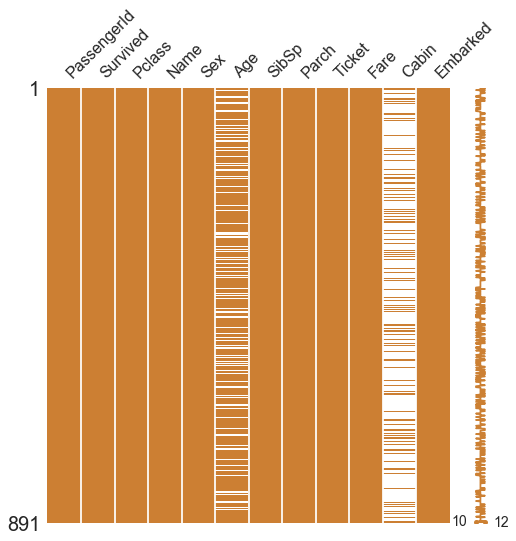

In [70]:
# msno를 이용해서 결측치를 시각화
# 어느위치에 널데이터가 분포했는지를 확인 가능
msno.matrix(df = df_train.iloc[:,:],figsize=(8,8), color = (0.8,0.5,0.2))

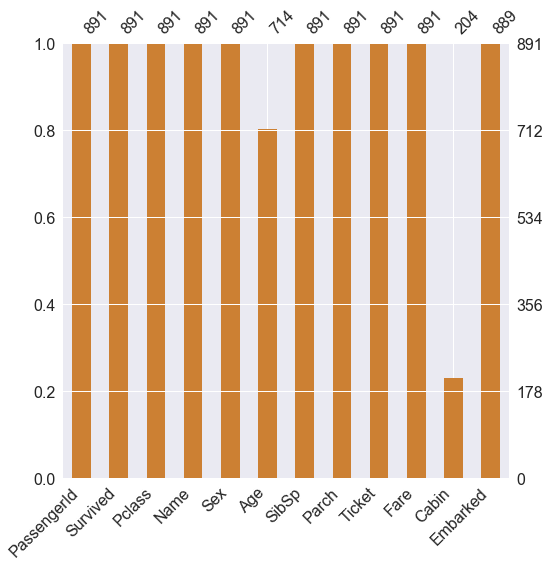

In [71]:
# 바차트  => 훨신 직관적 
# df_train
msno.bar(df = df_train.iloc[:,:], figsize=(8,8), color=(0.8, 0.5, 0.2))

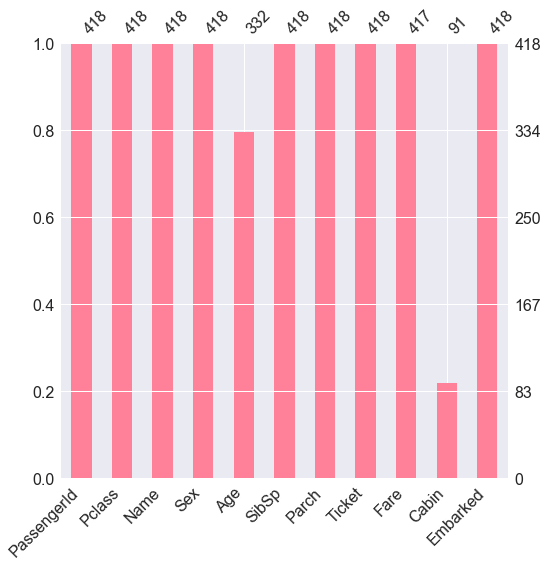

In [72]:
# df_test
msno.bar(df = df_test.iloc[:,:], figsize=(8,8), color=(1, 0.5, 0.6))

---
## 타겟 데이터 확인 
- 어떤 분포(distribution)를 가지고 있는 지 확인이 필요 
- 이진 분류(binary classification)문제에서는 0과 1의 분포가 어떠냐에 따라 모델의 평가방법이 다름    
- 타겟 레이블의 목적성이 명확해야한다 

#### 그래프를 그려보겠음 

In [73]:
df_train['Survived'].value_counts() # 0: 죽은사람 1: 산사람

0    549
1    342
Name: Survived, dtype: int64

In [74]:
# 총인원 
df_train['Survived'].value_counts().sum()

891

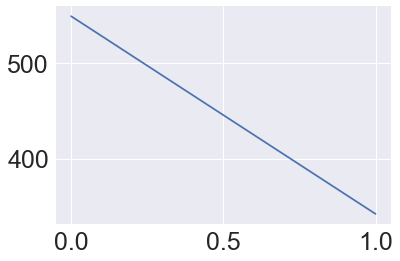

In [75]:
# 시리즈들은 항상 plot을 가지고 있음
# plt.plot(df_train['Survived'].value_counts())과 동일 
df_train['Survived'].value_counts().plot()

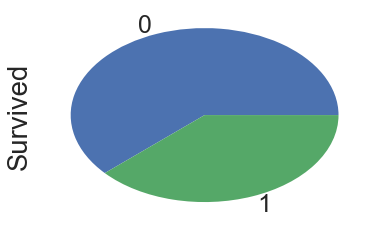

In [76]:
# 판다스가 메소드 형식으로 그래프 그리는 함수를 통일화시켜둠 
df_train['Survived'].value_counts().plot.pie()

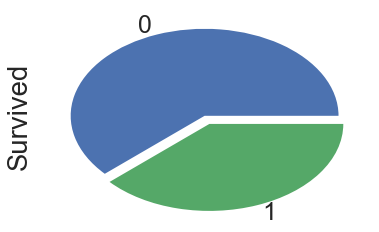

In [77]:
# pie에서 -> explode 기능을 확인 => 째는거 
df_train['Survived'].value_counts().plot.pie(explode=[0,0.1])

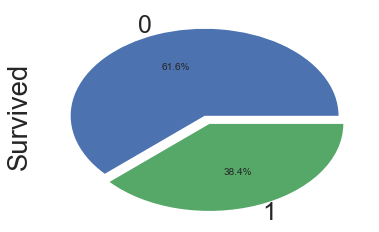

In [78]:
# pie에서 -> autopct 기능을 확인 =>  그래프 안에 퍼센트로 수치를 표현 
df_train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct ="%1.1f%%")

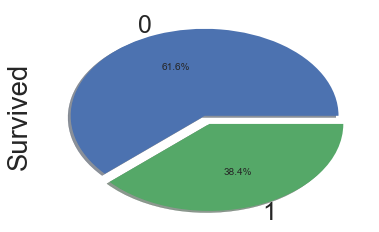

In [79]:
# pie에서 ->  shadow 기능을 확인 =>  True :그림자를 만든다.
df_train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct ="%1.1f%%", shadow =True)

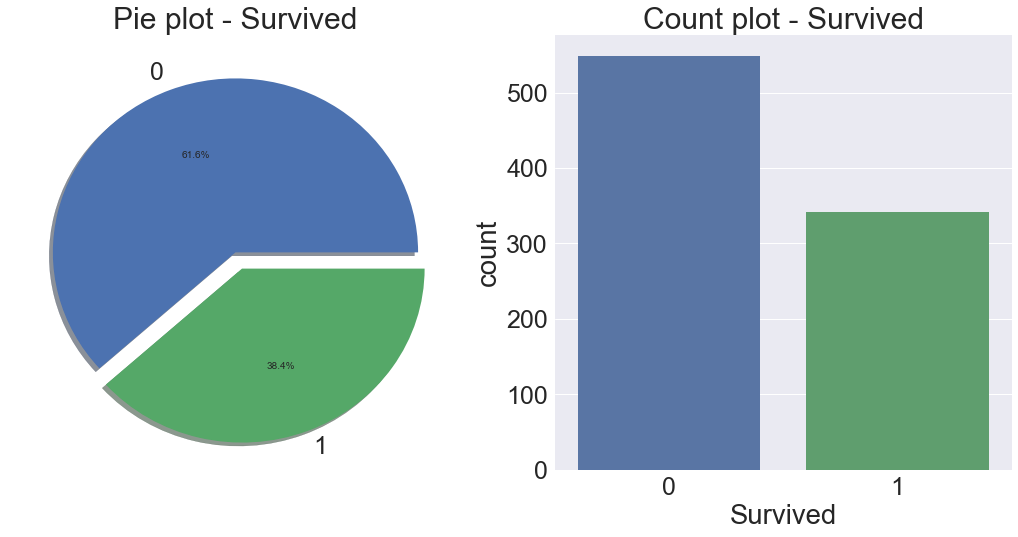

In [80]:
# 그래프 => 두개를 그림 
# 하나는 원 그래프 하나는 막대 그래프 

f, ax = plt.subplots(1,2,figsize = (18,8))

# 1번 : pieplot
df_train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct ="%1.1f%%",ax =ax[0], shadow =True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('') # 왼쪽의 레이블을 없애겠다

# 2번 : countplot
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()


- 죽은 사람이 눈에 띄게 많은 것을 확인할 수 있음
- 38.4% 만 살아 남은것을 확인할 수 있음 

---
# 탐색적 데이터 분석(EDA - Exploratory Data Analysis )
---
- 분석을 통해서 데이터 안에 숨겨진 정보를 찾아야함 
- 시각화 라이브러리를 이용해 정보들을 시각화 => 시각화 팩 : matplotlib, seaborn, plotly


----
- 목적을 찾아야 한다 
- 내가 하고자하는말 내가 보고자하는것을 시각화하는 능력을 키워야함
---

## Pclass
- pclass는 서수형 데이터 
    -> 카테고리형태이면서 순서를 나타내는 타입 
> 카테고리하면 떠올라야하는것이 -> 원핫 벡터

- 일단 pclass에 따른 생존률 차이를 확인 
    - 엑셀의 피벗차트와 유사한 작업이 진행 ... (그기능 몰라유 ...)
    - 판다스의 데이터 프레임에서 groupby를 이용하면 동일한기능을 쉽게 사용가능 
    
- 'Pclass', 'Survived' 를 palss로 묶음 
    - 각 pcalss 마다 0,1이 count => 평균을 내면 각 pclass 별로 생존률을 확인할 수 있음
    
---
#### Pclass의 가설 
- "Pclass - 좋은 객실을 사용한 승객이 더 많이 살아남았을 것이라는 가설 


In [81]:
# sum과 count의 차이 => 
df_train['Survived'].unique() # 0 과 1로 이루어 져있음 

array([0, 1], dtype=int64)

In [82]:
# 0과 1의 (객체) 수를 세하는것 
# df_train[['Pclass','Survived']].groupby(['Pclass']).count()
# 0과1을 연산하는것 
df_train[['Pclass','Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [83]:
# 데이터 프레임에 여러 컬럼이 있을 때 리스트로 컬럼을 묶음
# df_train[['Pclass','Survived']]
# df_train[['Pclass','Survived']].groupby
# df_train[['Pclass','Survived']].groupby(['Pclass']) # DataFrameGroupBy 객체가 만들어짐 
# 객체는 많은것을 가지고 있음 ..sum , count 등등 
df_train[['Pclass','Survived']].groupby(['Pclass']).count()

,Survived
Pclass,
1,216
2,184
3,491


In [84]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index = True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [85]:
type(df_train[['Pclass','Survived']].groupby(['Pclass'], as_index = True).count())

pandas.core.frame.DataFrame

In [86]:
# crosstab
# 쉽게 확인 가능 
# all의 여부  =>  margins= True
# 스타일 추가 => .style.background_gradient(cmap='summer_r') # GnBu # cool
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins= True).style.background_gradient(cmap='GnBu')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [87]:
# groupby에 mean() => 클래스 생존률을 얻을수 있음 80 / 80+136
class_Survived = df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean()
class_Survived

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


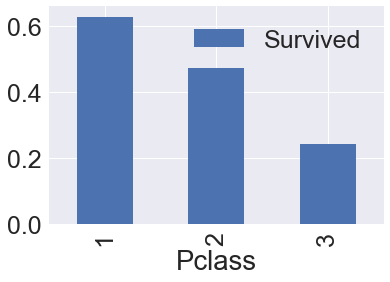

In [88]:
# ascending : 차순을 어떻게 할건지 
class_Survived.sort_values(by='Survived', ascending= False ).plot.bar()

- 클래스가 좋을수록 생존 확률이 높음 
- seaborn 의 countplot을 이용 -> 특정 레이블에 따른 개수를 확인 

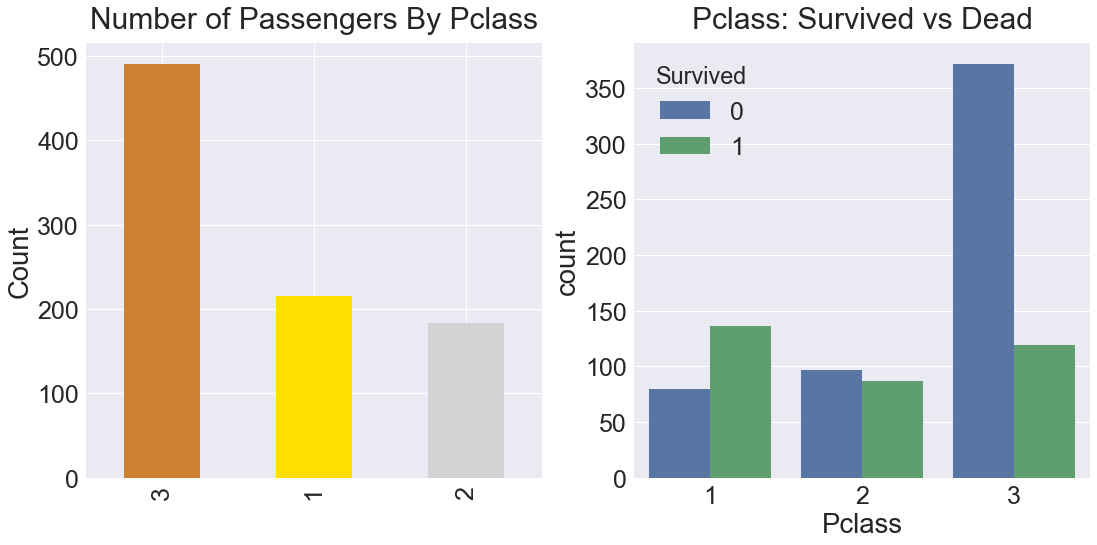

In [89]:
y_position = 1.02

f, ax = plt.subplots(1,2,figsize = (18,8))
df_train['Pclass'].value_counts().plot.bar( color = ['#CD7F32','#FFDF00','#D3D3D3'], ax = ax[0])
ax[0].set_title('Number of Passengers By Pclass', y = y_position )
ax[0].set_ylabel('Count')

# df_train 
# hue = 'Survived' # 바 색 설명
sns.countplot('Pclass',hue = 'Survived', data = df_train, ax = ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y = y_position )

plt.show()

# 뭐를 보여주기위해서 이그래프를 그렸는지 잘봐야한다. 
# 분석 해보자면 클래스별로 탑승인원을 그래프로 보여준다 
# 그리고 이 탑승인원별 생존자를 다시 그래프로 그린다. 

# 결론 ; 클래스가 좋을경우 더 많이 생존한것을 확인 가능 

---

## Sex 
- 기준은 생존
- 성별로 생존률이 어떻게 달라지는 지 확인 
- 위와같이 pandas와 seaborn 사용

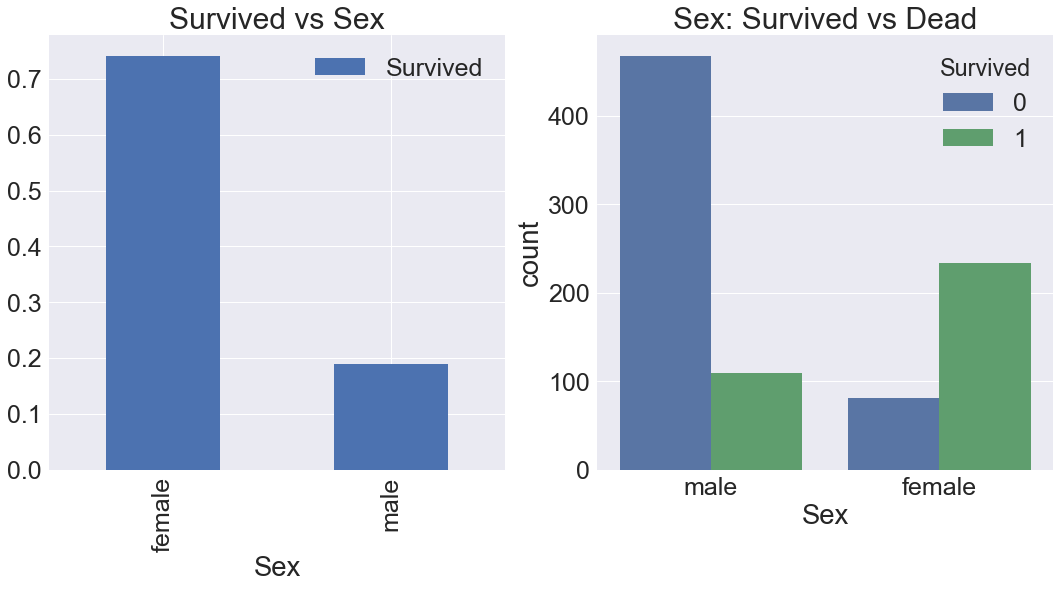

In [90]:
f, ax = plt.subplots(1, 2, figsize = (18,8))
# 1번 그래프
df_train[['Sex','Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
# 2번 그래프 
sns.countplot('Sex' ,hue='Survived', data=df_train,ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')

plt.show()

# 그래프를 통해 여자가 더 생존률이 높다는 것을 알 수 있다.

In [91]:
df_train[['Sex','Survived']].groupby(['Sex'],as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [92]:
df_groupby = df_train[['Sex','Survived']].groupby(['Sex'],as_index=False).mean()
df_groupby.sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [93]:
# 위에서 한번했음 
# pands crosstab
pd.crosstab(df_train['Sex'],df_train['Survived'], margins= True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [94]:
# 보기 편하게 스타일을 입히겠음 
df_crosstab = pd.crosstab(df_train['Sex'],df_train['Survived'], margins= True)
df_crosstab.style.background_gradient(cmap='summer_r') # 'GnBu'

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


- pclass와 마찬가지ㅡ  성별도 예측 모델에 쓰일 중요한 특징

---

## Both Sex and Pclass

- Sex and Pclass 두가지에 관해서 생존이 어떻게 연관이 있는지 확인 
- seaborn 의 factorplot 을 이용

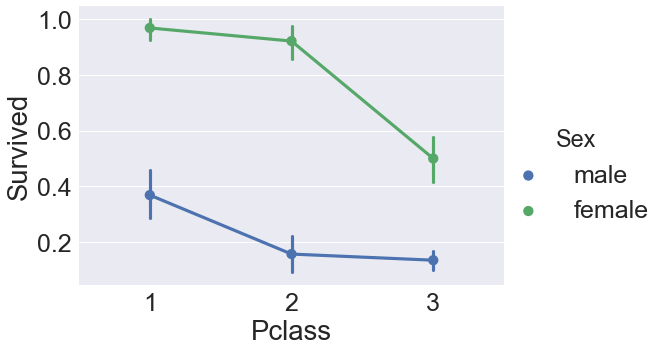

In [95]:
sns.factorplot('Pclass','Survived',hue='Sex', data = df_train , size=5 , aspect=1.5)

- 3가지를 한그래프에서 비교 ... 워우 
- 모든 클래스에서 female이 살 확률이 male보다 높은것을 확인 
- 남,여 상관없이 클래스가 높을수록 살 확률이 높음 

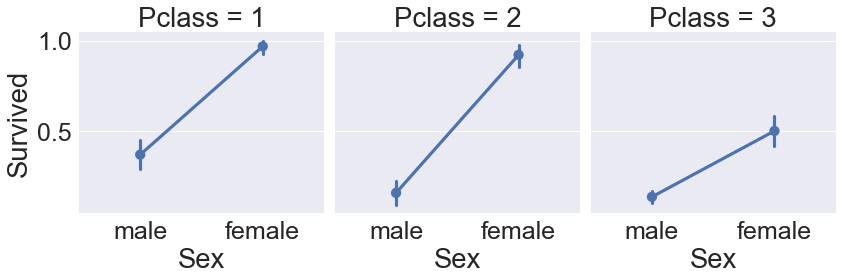

In [96]:
# hue 대신 column
# 각각 출력 
sns.factorplot(x='Sex',y='Survived', col='Pclass',data=df_train, satureation=.5, sixz=10 , aspect=1)

---

## Age

In [97]:
# 나이의 특징을 확인 
# {:.1f} => 소수점 한자리까지 표현  => 데이터와 데이터 통일 
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train.['Age'].max())) 
print('제일 나이 어린 탑승객 : {:.1f} Years'.format(df_train.['Age'].min()))
print('탑승객 평균 나이: {:.1f} Years'.format(df_train.Age.mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 나이 어린 탑승객 : 0.4 Years
탑승객 평균 나이: 29.7 Years


In [98]:
#  살아 있는 승객만 추출 
df_train[df_train['Survived'] == 1 ].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [99]:
# 살아 있는 승객이 나이만 추출 
df_train[df_train['Survived'] == 1 ]['Age']

1      38.00
2      26.00
3      35.00
8      27.00
9      14.00
10      4.00
11     58.00
15     55.00
17       NaN
19       NaN
21     34.00
22     15.00
23     28.00
25     38.00
28       NaN
31       NaN
32       NaN
36       NaN
39     14.00
43      3.00
44     19.00
47       NaN
52     49.00
53     29.00
55       NaN
56     21.00
58      5.00
61     38.00
65       NaN
66     29.00
       ...  
809    33.00
820    52.00
821    27.00
823    27.00
827     1.00
828      NaN
829    62.00
830    15.00
831     0.83
835    39.00
838    32.00
839      NaN
842    30.00
849      NaN
853    16.00
855    18.00
856    45.00
857    51.00
858    24.00
862    48.00
865    42.00
866    27.00
869     4.00
871    47.00
874    28.00
875    15.00
879    56.00
880    25.00
887    19.00
889    26.00
Name: Age, Length: 342, dtype: float64

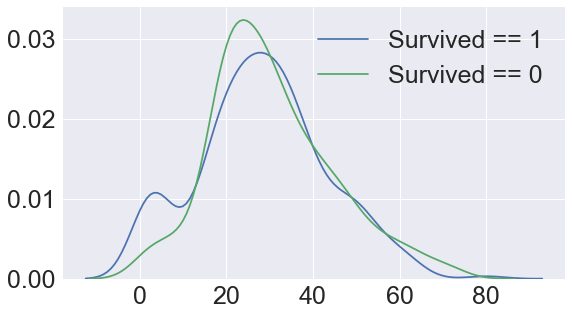

In [101]:
# 생존에 따른 Age 히스토그램 
# 비교 -> 산사람 나이랑 죽은사람 나이를 그래프를 통해 비교 
fig, ax = plt.subplots(1,1, figsize = (9, 5)) 
sns.kdeplot(df_train[df_train['Survived'] == 1 ]['Age'], ax = ax )
sns.kdeplot(df_train[df_train['Survived'] == 0 ]['Age'], ax = ax )

plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

# 생존자 중 나이가 어린 경우가 많은것을 볼 수 있음 

In [107]:
# 나이에 따른 클래스  
first_calss  = df_train['Age'][df_train['Pclass'] == 1]
second_calss = df_train['Age'][df_train['Pclass'] == 2]
third_calss  = df_train['Age'][df_train['Pclass'] == 3]
print(first)

1      38.0
3      35.0
6      54.0
11     58.0
23     28.0
27     19.0
30     40.0
31      NaN
34     28.0
35     42.0
52     49.0
54     65.0
55      NaN
61     38.0
62     45.0
64      NaN
83     28.0
88     23.0
92     46.0
96     71.0
97     23.0
102    21.0
110    47.0
118    24.0
124    54.0
136    19.0
137    37.0
139    24.0
151    22.0
155    51.0
       ... 
763    36.0
765    51.0
766     NaN
779    43.0
781    17.0
782    29.0
789    46.0
793     NaN
796    49.0
802    11.0
806    39.0
809    33.0
815     NaN
820    52.0
822    38.0
829    62.0
835    39.0
839     NaN
842    30.0
849     NaN
853    16.0
856    45.0
857    51.0
862    48.0
867    31.0
871    47.0
872    33.0
879    56.0
887    19.0
889    26.0
Name: Age, Length: 216, dtype: float64


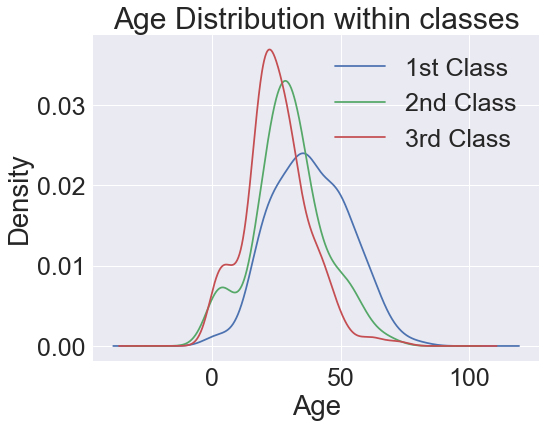

In [109]:
# 클래스안 나이의 분포 확인 
plt.figure(figsize=(8,6))

# 그래프 그리기 
first_calss.plot(kind='kde')
second_calss.plot(kind='kde')
third_calss.plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
# 이름표
plt.legend(['1st Class','2nd Class','3rd Class'])

# class 가 높을수록 나이 많은 사람의 비중이 커짐 
# 나이대가 변하면서 생존률이 어떻게 되는지 확인이 필요 
# 나이의 범위를 점점 넓혀가면서 생존률 확인 

In [111]:
cummulate_survival_ratio = []

for i in range(1,80):
    # 평균을 구하네 
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum()/ len(df_train[df_train['Age']< i ]['Survived']))
    
# cummulate_survival_ratio

[1.0,
 0.8571428571428571,
 0.625,
 0.6666666666666666,
 0.675,
 0.7045454545454546,
 0.7021276595744681,
 0.68,
 0.6666666666666666,
 0.6129032258064516,
 0.59375,
 0.5735294117647058,
 0.5797101449275363,
 0.5915492957746479,
 0.5769230769230769,
 0.5903614457831325,
 0.55,
 0.5398230088495575,
 0.5035971223021583,
 0.4817073170731707,
 0.45555555555555555,
 0.4264705882352941,
 0.42424242424242425,
 0.41700404858299595,
 0.4244604316546763,
 0.4119601328903654,
 0.40752351097178685,
 0.41839762611275966,
 0.4065934065934066,
 0.40625,
 0.40389294403892945,
 0.40654205607476634,
 0.4107142857142857,
 0.4103671706263499,
 0.4091858037578288,
 0.4164989939637827,
 0.41923076923076924,
 0.41634980988593157,
 0.4171322160148976,
 0.41560798548094374,
 0.41519434628975266,
 0.4143356643356643,
 0.4153846153846154,
 0.4135593220338983,
 0.41235392320534225,
 0.4110929853181077,
 0.4090909090909091,
 0.4048,
 0.4085173501577287,
 0.4109375,
 0.4123076923076923,
 0.410958904109589,
 0.411764

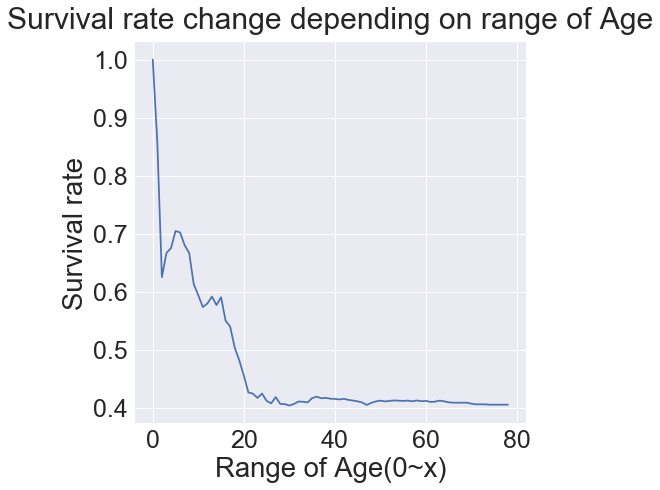

In [112]:
cummulate_survival_ratio = []

for i in range(1,80):
    # 평균을 구하네 
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum()/ len(df_train[df_train['Age']< i ]['Survived']))
    
# cummulate_survival_ratio

plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age',y=1.02)

plt.xlabel('Range of Age(0~x)')
plt.ylabel('Survival rate')

plt.show()

# 나이가 어릴수록 생존률이 높다는것을 확인 가능 
# 나이가 중요한 특징임을 확인 

---

## Pclass, Sex , Age 
- 위 세가지르 한그래프에 담아 확인 => seaborn의 바이올린 폴렛을 이용해서 작업 
- 나눠서 확인 : x축은 case(Pclass, Sex)를 y축은 distribution(Age)

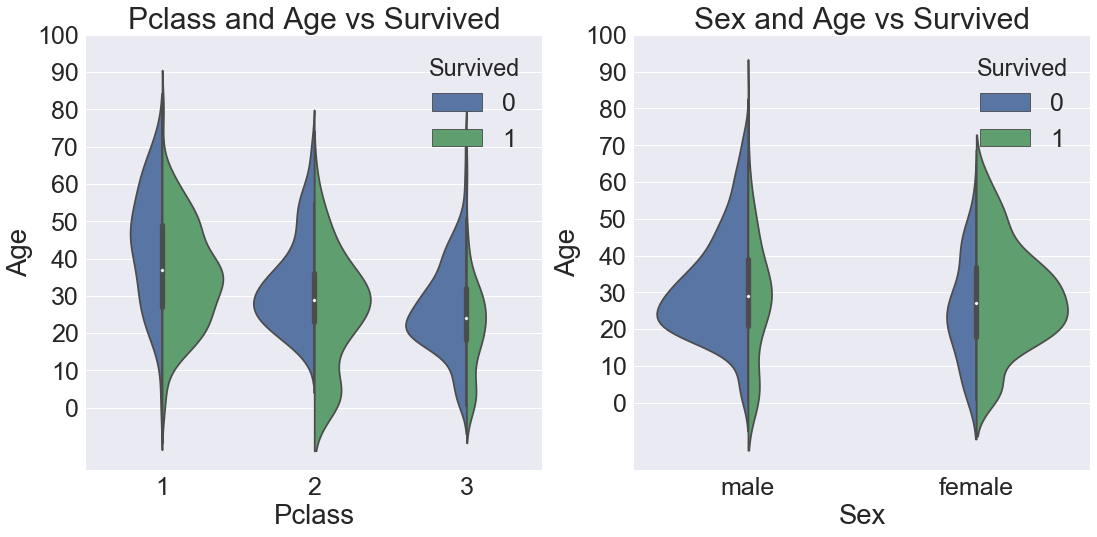

In [119]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))

sns.violinplot("Pclass","Age", hue= "Survived", data = df_train, scale='count', split = True, ax = ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex", "Age", hue= "Survived", data = df_train, scale ='count', split = True, ax = ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

- 클래스 별로 각 아이템의 분포가 어떻게 다른지 거기에 생존여부에 따라 구분한 그래프 
- 생존만 봤을때 모든 클래스에서 나이가 어릴수록 많이 생존한것을 확인 
- 성별로 봤을 경우 남성보다 여성이 많이 생존한 것을 확인 

- 침몰때 여성과 아이를 먼저 챙긴 것을 볼수 있음 

---

## Embarked (탑승 항구)

- 탑승한 곳에 따른 생존률 

In [123]:
# 그룹화 해서 평균 
embarked_group= df_train[['Embarked','Survived']].groupby(['Embarked'], as_index=True)
embarked_group.mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


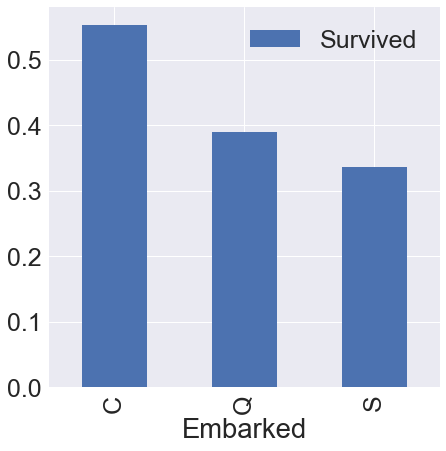

In [124]:
f, ax = plt.subplots(1,1,figsize=(7,7))

embarked_group.mean().sort_values(by='Survived',ascending=False).plot.bar(ax=ax)

- 생존률은 비슷한것으로 확인 
- 명확하지 않지만 모델에 사용 
- 모델을 만들고나면 각 특징이 얼마나 중요한 역활을 했는지를 확인 가능 

- 다른 특징으로 split해서 확인 

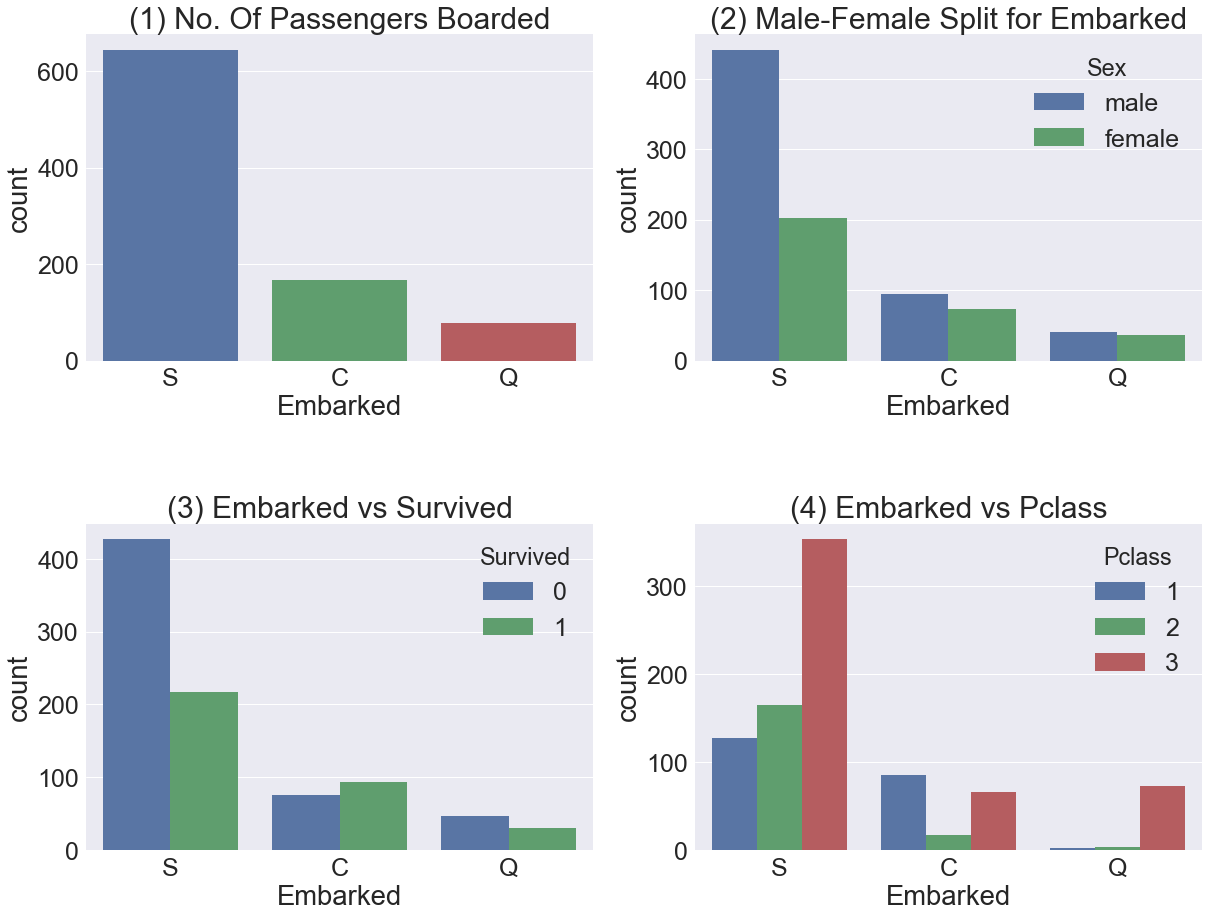

In [129]:
f, ax = plt.subplots(2,2, figsize=(20,15))

# 탑승항구에 따른 승객 수 
sns.countplot('Embarked', data=df_train, ax = ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
# 탑승 항구에 따른 성별
sns.countplot('Embarked', hue= 'Sex', data=df_train, ax = ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
# 탑승항구에 따른 생존률 
sns.countplot('Embarked', hue='Survived', data=df_train, ax = ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
# 탑승항구에 따른 클래스 
sns.countplot('Embarked', hue='Pclass', data = df_train, ax = ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5) # 각 그래프간 간격 조절 
plt.show()

- 1. 전체적으로 S에서 탑승자수가 가장 많은것으로 확인 
- 2. C와Q는 남녀의 비율이 비슷하고, S는 남자가 더 많은것으로 확인 
- 3. 생존확률이 S경우 많이 낮은것을 확인 할수 있음 
- 4. 클래스로 나누어보니 C가 생존할 확률이 높은건 사람이 많이 탑승했기 때문 S는 3클래스 사람들이 적게 타서 생존률이 낮은것을 확인 


---

## Family - SibSp(형제, 자매) + Parch(부모, 자녀)

- Family =  SibSp + Parch

In [130]:
df_train['SibSp'] + df_train['Parch']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Length: 891, dtype: int64

In [131]:
# 자신이 미포한 그래서 1을 더해줌 
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [135]:
# 최대
print("Maximum size of Family:",df_train['FamilySize'].max())
# 최소
print("Maximum size of Family:",df_train['FamilySize'].min())

Maximum size of Family: 11
Maximum size of Family: 1


In [143]:
df_train[['FamilySize','Survived']].groupby(['FamilySize'],as_index =True).mean()

,Survived
FamilySize,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


In [145]:
grooup_Fam = df_train[['FamilySize','Survived']].groupby(['FamilySize'],as_index =True)
grooup_Fam.mean().sort_values(by='Survived',ascending= False)

,Survived
FamilySize,
4,0.724138
3,0.578431
2,0.552795
7,0.333333
1,0.303538
5,0.200000
6,0.136364
8,0.000000
11,0.000000


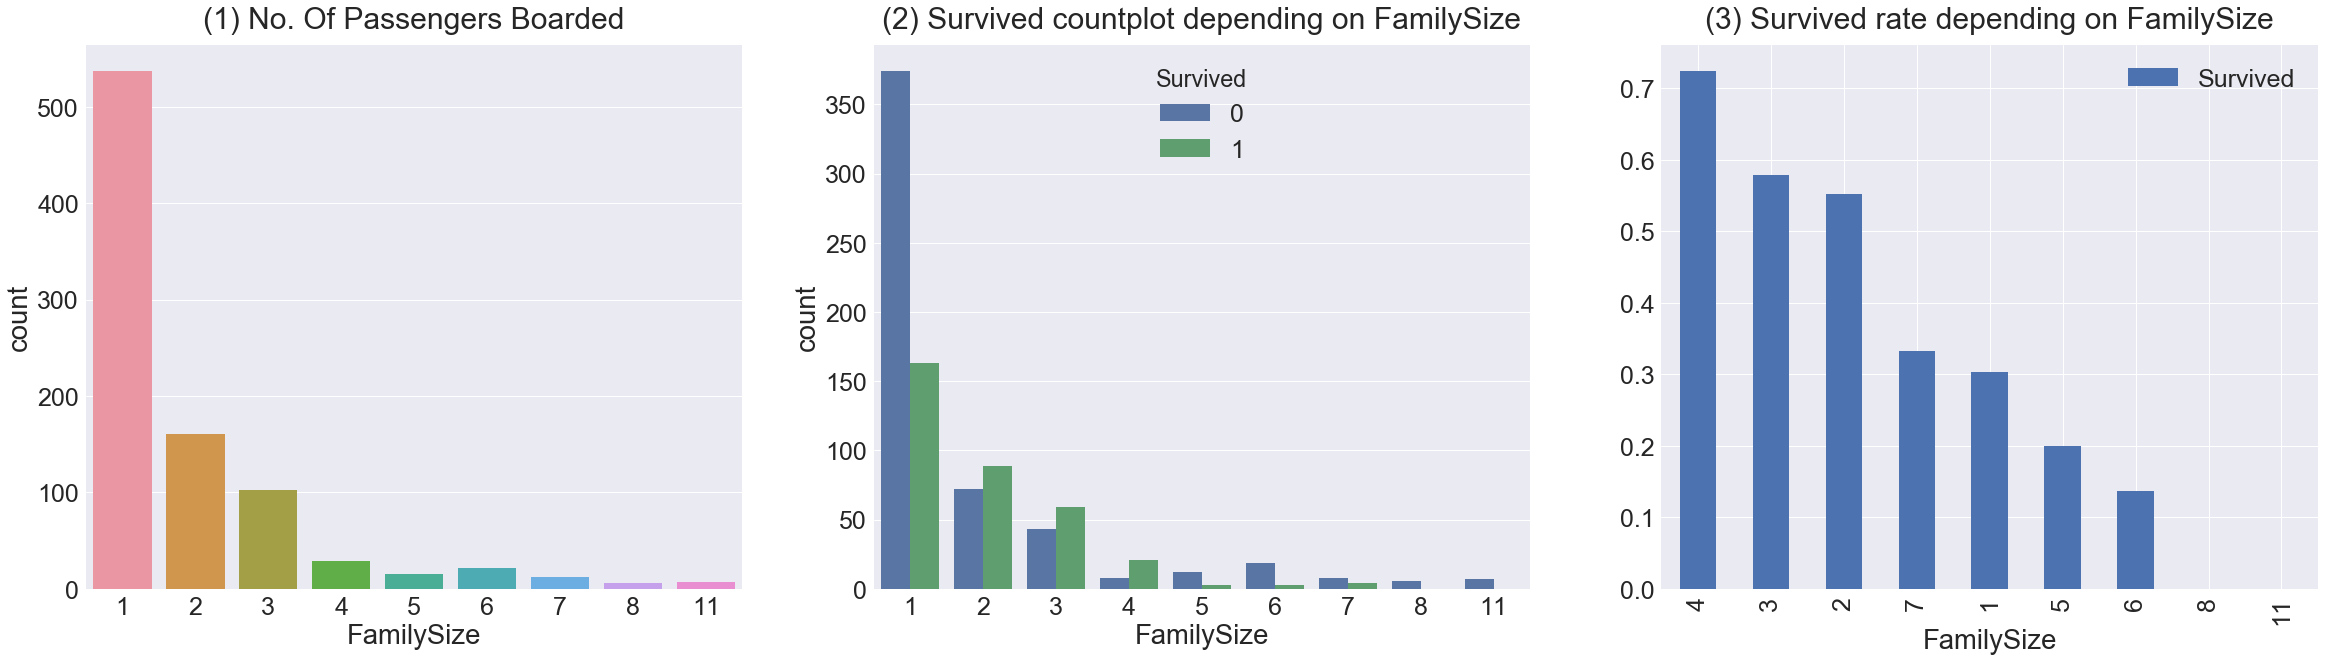

In [151]:
# 가족수와 생존의 상관 관계를 확인 
f, ax = plt.subplots(1,3, figsize= (40,10))

sns.countplot('FamilySize', data= df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived',data = df_train, ax= ax[1])
# y=1.02 는 글자와 그래프 사이의 간격 조절 
ax[1].set_title('(2) Survived countplot depending on FamilySize',y=1.02)

grooup_Fam.mean().sort_values(by='Survived',ascending= False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02 )

plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

- 1. 가족의 크기가 1명에서 11명 까지 있다는것을 확인 
    - 대부분 1명
- 2,3. 가족의 크기에 따른 생존률 비교 
    - 4인 가족인경우가 생존률이 가장 높음
    - 5인 이상부터 생존률이 하락하는 것을 확인
    - 가족수가 작아도 커도 생존확률이 적은것을 확인 
    - 3~4명선이 가장 생존률이 많은 것을 확인 
    

---